In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Directories
train_dir = 'cheatingDataset/train'
val_dir   = 'cheatingDataset/valid'
test_dir  = 'cheatingDataset/test'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 618 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [3]:
# Load a pre-trained MobileNetV2 model without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze the base model to focus on training new layers

In [4]:
# Build new top layers for binary classification
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

In [5]:
model = Model(inputs, outputs)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stop]
)

C:\Users\arnel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.5476 - loss: 0.8564 - val_accuracy: 0.4828 - val_loss: 0.7165
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5745 - loss: 0.7847 - val_accuracy: 0.6379 - val_loss: 0.6827
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6063 - loss: 0.7137 - val_accuracy: 0.6034 - val_loss: 0.6764
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.6291 - loss: 0.6500 - val_accuracy: 0.6207 - val_loss: 0.6734
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.6409 - loss: 0.6517 - val_accuracy: 0.6552 - val_loss: 0.6191
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6704 - loss: 0.6210 - val_accuracy: 0.6724 - val_loss: 0.6089
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6947 - loss: 0.5755 - val_accuracy: 0.6552 - val_loss: 0.6180
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7081 - loss: 0.5667 - val_accuracy: 0.6379 - val_loss:

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a test data generator with only rescaling (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to disable shuffling for evaluation
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 34 images belonging to 2 classes.


c:\Users\arnel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 984ms/step - accuracy: 0.4504 - loss: 0.8112
Test accuracy: 0.44117647409439087


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction: Cheating


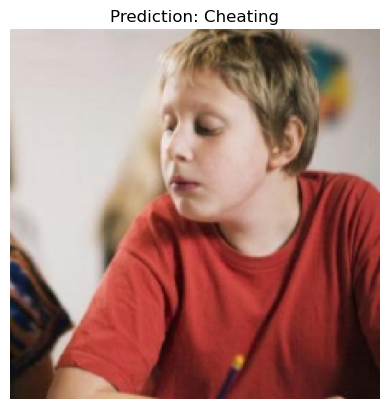

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image
img_path = 'cheatingDataset/Prediction/new_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction: Cheating


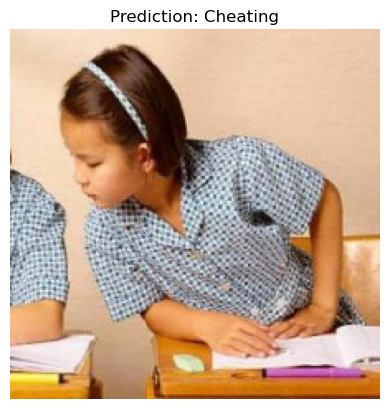

In [11]:
# Load a sample image
img_path = 'cheatingDataset/Prediction/image_2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Prediction: Not Cheating


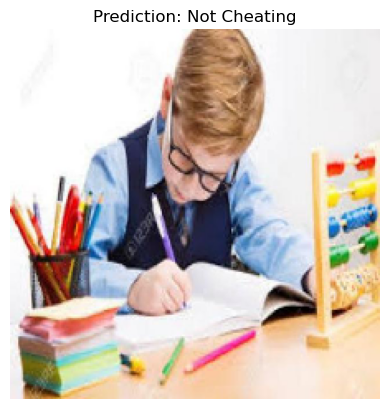

In [12]:
# Load a sample image
img_path = 'cheatingDataset/Prediction/image_3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction: Not Cheating


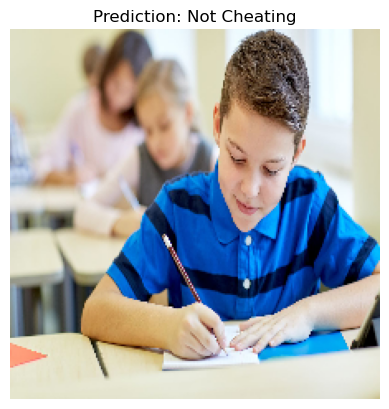

In [13]:
# Load a sample image
img_path = 'cheatingDataset/Prediction/image_5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction: Not Cheating


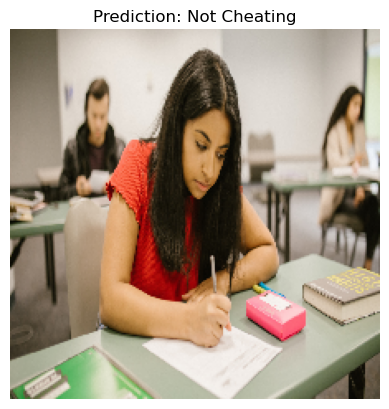

In [14]:
# Load a sample image
img_path = 'cheatingDataset/Prediction/image_6.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction: Cheating


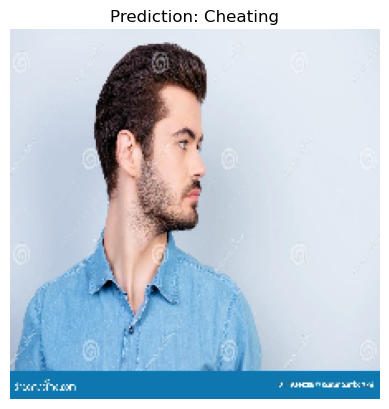

In [15]:
# Load a sample image
img_path = 'cheatingDataset/Prediction/image_7.webp'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Prediction: Cheating


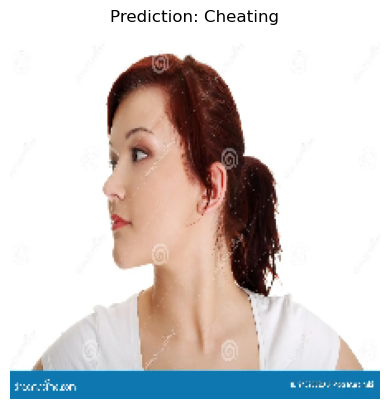

In [16]:
# Load a sample image
img_path = 'cheatingDataset/Prediction/image_8.webp'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get prediction
prediction = model.predict(img_array)
result = "Cheating" if prediction[0][0] < 0.5 else "Not Cheating"
print("Prediction:", result)

# Plot image with prediction
plt.imshow(img)
plt.title("Prediction: " + result)
plt.axis("off")
plt.show()

In [9]:
model.save("cheating_detection_model.h5")